In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
with open('data/data2-train.dat', 'r') as f:
    y = []
    x = []
    for line in f:
        data = line.split(' ')
        assert len(data) == 3
        x.append([float(data[0]), float(data[1])])
        y.append(float(data[2]))

In [287]:
"""
Helper function to read data files
"""
filename = 'data/data2-train.dat'
#filename = 'data/example.dat'
dt = np.dtype([("X", np.float), ("W", np.float), ("C", np.float)])
data = np.loadtxt(filename, dtype=dt, comments="#", delimiter=None)
data = np.array([[d[0], d[1], d[2]] for d in data])

In [288]:
class Node():
    left = None
    right = None
    value = None
    min_x = None
    max_x = None
    min_y = None
    max_y = None
    isArrayLeaf = False
    def __init__(self, value, split_axes, min_x, max_x, min_y, max_y): 
        self.value = value
        self.split_axes = split_axes
        self.min_x = min_x
        self.max_x = max_x
        self.min_y = min_y
        self.max_y = max_y
        
    def getValue(self):
        return self.value

In [451]:
class custom_KDTree(object):
    def __init__(self, k=2, max_depth = None):
        """
        Initialize the KD tree and parameters
        """
        self.k = k
        self.root = None
        self.data = None
        self.max_depth = max_depth
        pass

    def create_tree(self, data, depth = 0, parent = None, left = False,
                    splitting_dim_mode = 0, split_point_mode = 0):
        """
        Create the tree
        splitting_dim_mode: 0 -> alternate between the x and the y dimension
                            1 -> split the data along the dimension of higher variance
        split_point_mode: 0 -> split at the median of the data
                          1 -> split at the midpoint of the data
        """
        if len(data) == 0:
            return
        
        if parent == None:
            min_x = data[:,0].min()
            max_x = data[:,0].max()

            min_y = data[:,1].min()
            max_y = data[:,1].max()

        if parent is not None:
            if parent.split_axes == 0:
                max_y = parent.max_y
                min_y = parent.min_y
                if left:
                    min_x = parent.min_x
                    max_x = parent.getValue()
                else:
                    min_x = parent.getValue()
                    max_x = parent.max_x
            elif parent.split_axes == 1:
                max_x = parent.max_x
                min_x = parent.min_x
                if left:
                    min_y = parent.min_y
                    max_y = parent.getValue()
                else:
                    min_y = parent.getValue()
                    max_y = parent.max_y
            else:
                assert 1 == 0
                
        if splitting_dim_mode == 0:
            i = depth % self.k
        else:
            var = data[:,:2].var(0)
            i = var.argmax()
        
        assert i == 0 or i == 1
        
        if len(data) == 1:
            node = Node(data[0][i], i, min_x, max_x, min_y, max_y)
            node.left = None
            node.right = None
            return node
        
        if split_point_mode == 0:
            data = data[data[:, i].argsort()]
            split_index = int(len(data) / 2)
            node = Node(data[split_index][i], i, min_x, max_x, min_y, max_y)
            left_data = data[:split_index]
            right_data = data[split_index+1:]
        else:
            left_data = []
            right_data = []
            mean = data[:, i].mean()
            node = Node(mean, i, min_x, max_x, min_y, max_y)
            for row in data:
                if row[i] > mean:
                    right_data.append(row)
                else:
                    left_data.append(row)
                    
            left_data = np.array(left_data)
            right_data = np.array(right_data)
         
        if depth == 0:
            self.root = node
            self.data = data
        
        
        if self.max_depth is not None and depth == self.max_depth:
            leftNode = Node(left_data, None, None, None, None, None)
            leftNode.isArrayLeaf = True
            rightNode = Node(right_data, None, None, None, None, None)
            rightNode.isArrayLeaf = True
            node.left = leftNode
            node.right = rightNode
            return node
        
        node.left = self.create_tree(left_data, depth + 1, node, True)
        node.right = self.create_tree(right_data, depth +1, node, False)
        
        return node
        
        
    def draw(self):
        fig, ax = plt.subplots()
        fig.set_size_inches(10.5, 20.5)
        ax.scatter( self.data[:,0],  self.data[:,1])
        ax.axis('off')
        ax.add_patch(plt.Rectangle((self.data[:,0].min(),  self.data[:,1].min()), abs(self.data[:,0].max() - self.data[:,0].min()), abs(self.data[:,1].max() - self.data[:,1].min()), ec='k', fc='none'))
        self.draw_tree(self.root, ax)
        plt.show()
    
    def draw_tree(self, root, ax):
        if root == None or root.isArrayLeaf:
            return
        
        if root.split_axes == 0:
            ax.plot([root.getValue(), root.getValue()], [root.min_y, root.max_y], c='black')

        elif root.split_axes == 1:
            ax.plot([root.min_x, root.max_x], [root.getValue(), root.getValue()], c='black')

        self.draw_tree(root.left, ax)
        self.draw_tree(root.right, ax)        

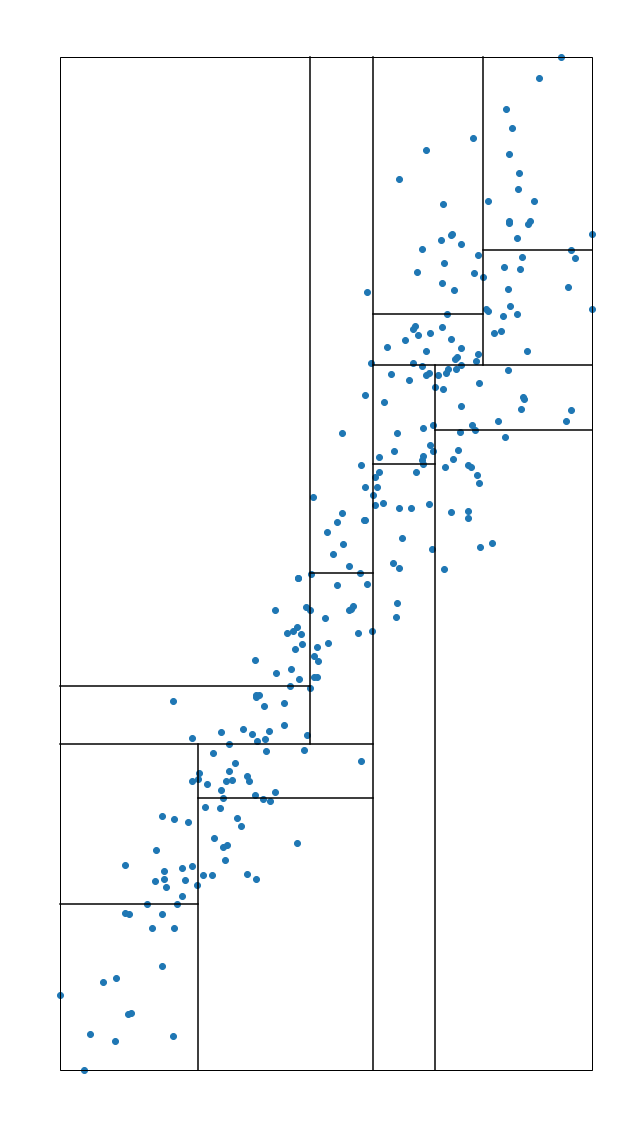

In [452]:
kd_tree = custom_KDTree(max_depth=3)
kd_tree.create_tree(data, splitting_dim_mode=0, split_point_mode=0)
kd_tree.draw()

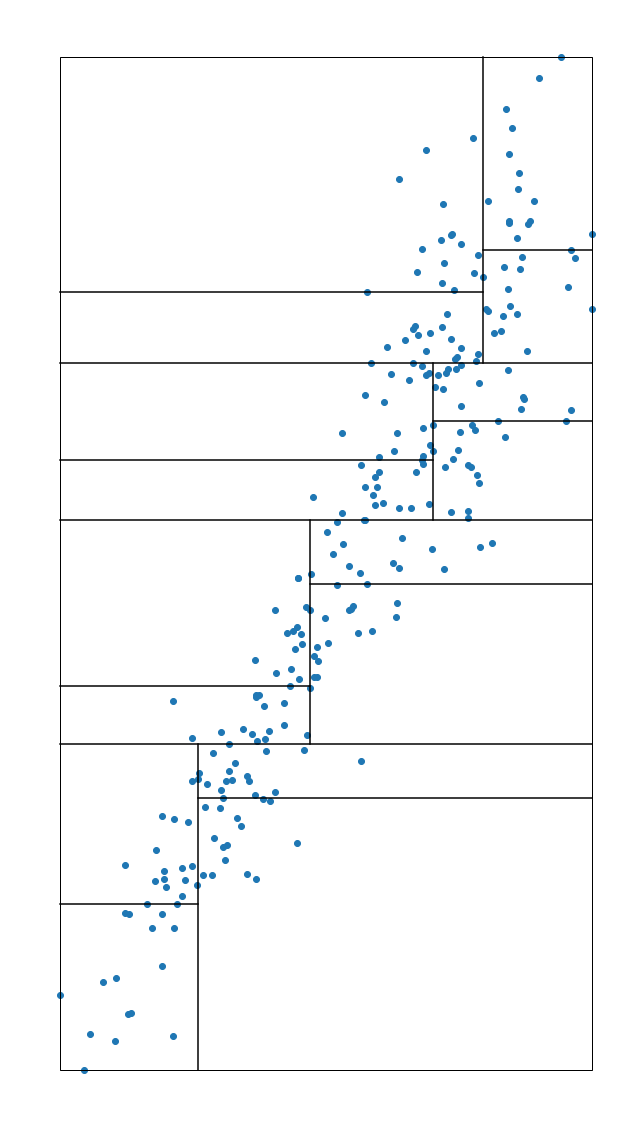

In [448]:
kd_tree = custom_KDTree(max_depth=3)
kd_tree.create_tree(data, splitting_dim_mode=1, split_point_mode=0)
kd_tree.draw()

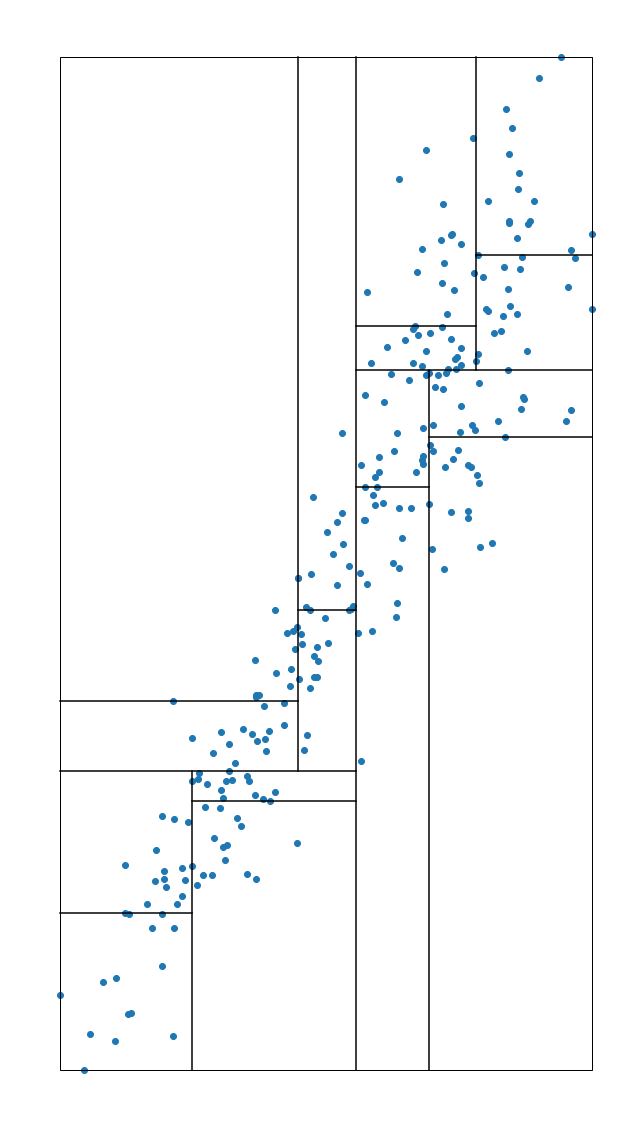

In [449]:
kd_tree = custom_KDTree(max_depth=3)
kd_tree.create_tree(data, splitting_dim_mode=0, split_point_mode=1)
kd_tree.draw()

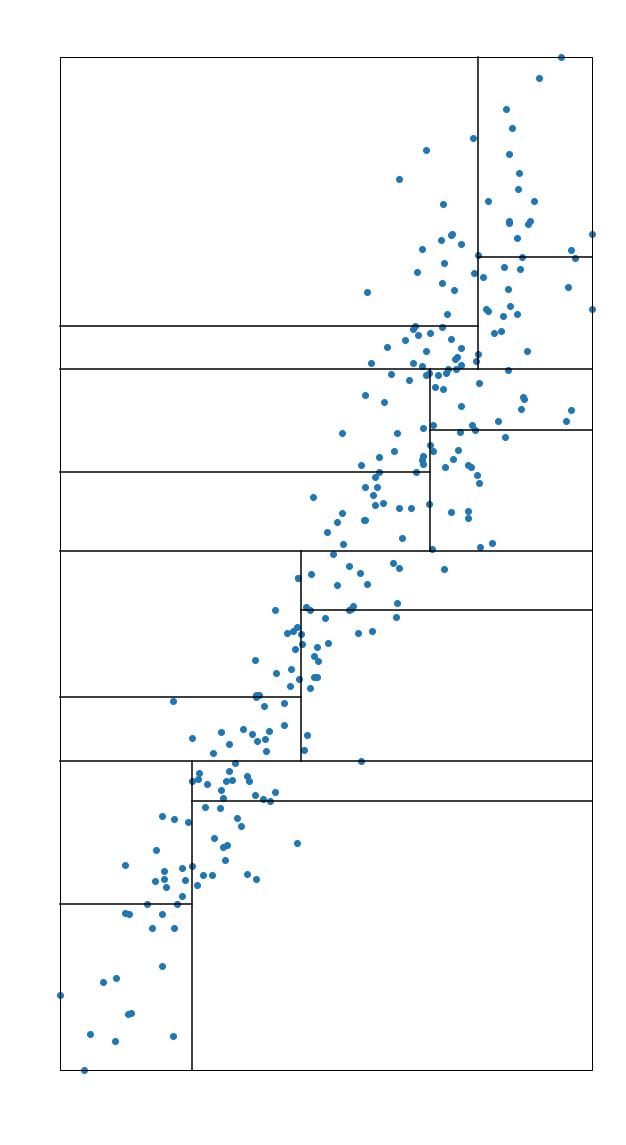

In [450]:
kd_tree = custom_KDTree(max_depth=3)
kd_tree.create_tree(data, splitting_dim_mode=1, split_point_mode=1)
kd_tree.draw()